# 패턴인식 Final Project

## 학번 : 1932095001 
## 이름 : 허 주 성

--------------------

## 데이터셋 : Data set : Fashion MNIST (https://github.com/zalandoresearch/fashion-mnist)

--------

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##  1) Bayesian Classifier (Assuming Gaussian distribution)

In [145]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
X_train = X_train[:1000]
Y_train = Y_train[:1000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]

class NaiveBayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in self.gaussians.items():
            mean, var = g['mean'], g['var']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


if __name__ == '__main__':

    model = NaiveBayes()
    model.fit(X_train, Y_train)

    print("Train accuracy:", model.score(X_train, Y_train))

    print("Test accuracy:", model.score(X_test, Y_test))

Train accuracy: 0.715
Test accuracy: 0.673


----

## 2) kNN (k=1, 3, 5)

In [135]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [136]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
X_train = X_train[:1000]
Y_train = Y_train[:1000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]

### K = 1

In [168]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 83   2   4   0   1   0  15   0   2   0]
 [  3 100   0   2   0   0   0   0   0   0]
 [  5   0  68   1  18   0  19   0   0   0]
 [ 14   3   1  64   5   0   6   0   0   0]
 [  0   1  16   6  74   0  18   0   0   0]
 [  0   0   0   0   0  57   0  18   2  10]
 [ 14   1  13   4   9   0  56   0   0   0]
 [  0   0   0   0   0   1   0  89   0   5]
 [  1   0   4   0   0   0   2   2  86   0]
 [  0   0   0   0   0   0   0   3   0  92]]
             precision    recall  f1-score   support

          0       0.69      0.78      0.73       107
          1       0.93      0.95      0.94       105
          2       0.64      0.61      0.63       111
          3       0.83      0.69      0.75        93
          4       0.69      0.64      0.67       115
          5       0.98      0.66      0.79        87
          6       0.48      0.58      0.53        97
          7       0.79      0.94      0.86        95
          8       0.96      0.91      0.93        95
          9       0.86      0.97      

### K = 3

In [169]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[86  1  6  0  0  0 12  0  2  0]
 [ 3 99  0  3  0  0  0  0  0  0]
 [ 5  1 68  1 18  0 17  0  1  0]
 [15  2  1 67  2  0  6  0  0  0]
 [ 1  1 19 10 71  0 13  0  0  0]
 [ 0  0  0  0  0 56  0 20  1 10]
 [21  1 17  4  7  0 46  0  1  0]
 [ 0  0  0  0  0  2  0 84  0  9]
 [ 2  0  5  0  2  1  1  1 83  0]
 [ 0  0  0  0  0  0  0  3  0 92]]
             precision    recall  f1-score   support

          0       0.65      0.80      0.72       107
          1       0.94      0.94      0.94       105
          2       0.59      0.61      0.60       111
          3       0.79      0.72      0.75        93
          4       0.71      0.62      0.66       115
          5       0.95      0.64      0.77        87
          6       0.48      0.47      0.48        97
          7       0.78      0.88      0.83        95
          8       0.94      0.87      0.91        95
          9       0.83      0.97      0.89        95

avg / total       0.76      0.75      0.75      1000



### K = 5

In [137]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [138]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[88  2  5  2  0  0  8  0  2  0]
 [ 5 98  0  2  0  0  0  0  0  0]
 [ 5  0 76  1 13  0 16  0  0  0]
 [15  1  1 71  0  0  5  0  0  0]
 [ 2  1 15  7 77  0 13  0  0  0]
 [ 0  0  0  0  0 56  0 22  3  6]
 [19  1 17  2 10  0 47  0  1  0]
 [ 0  0  0  0  0  1  0 84  0 10]
 [ 1  0  6  0  3  1  3  0 81  0]
 [ 0  0  0  0  0  0  0  2  0 93]]
             precision    recall  f1-score   support

          0       0.65      0.82      0.73       107
          1       0.95      0.93      0.94       105
          2       0.63      0.68      0.66       111
          3       0.84      0.76      0.80        93
          4       0.75      0.67      0.71       115
          5       0.97      0.64      0.77        87
          6       0.51      0.48      0.50        97
          7       0.78      0.88      0.83        95
          8       0.93      0.85      0.89        95
          9       0.85      0.98      0.91        95

avg / total       0.78      0.77      0.77      1000



-----

## 3) 3-layer Neural Network Classifier

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 2s 27us/sample - loss: 3.1520 - accuracy: 0.7056
Epoch 2/5
60000/60000 [==============================] - 1s 24us/sample - loss: 0.6592 - accuracy: 0.7750
Epoch 3/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.5698 - accuracy: 0.8004
Epoch 4/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.5442 - accuracy: 0.8134
Epoch 5/5
60000/60000 [==============================] - 1s 23us/sample - loss: 0.5191 - accuracy: 0.8261
10000/10000 - 0s - loss: 0.5455 - accuracy: 0.8226

테스트 정확도: 0.8226


---

## 4) Convolutional Neural Networks

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils

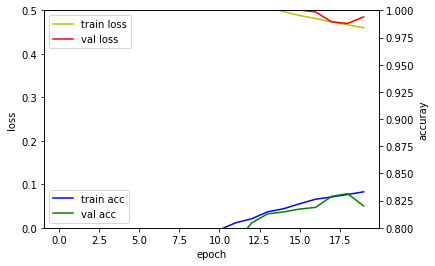

10000/10000 [==============================] - 1s 95us/sample - loss: 0.4954 - accuracy: 0.8165
## evaluation loss and_metrics ##
[0.49540478830337525, 0.8165]


In [101]:
width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:10000]
y_train = y_train[:10000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=20, verbose=0, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

---

## 5) SVM(Support Vector Machine)

In [146]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
X_train = X_train[:1000]
Y_train = Y_train[:1000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]

In [151]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()), ('SVM', SVC(kernel='poly'))]
pipeline = Pipeline(steps) # define Pipeline object

parameters = {'SVM__C':[0.001, 0.1, 100, 10e5], 'SVM__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [152]:
grid.fit(X_train, Y_train)
print ("score = %3.2f" %(grid.score(X_test, Y_test)))
print ("best parameters from train data: ", grid.best_params_)

y_pred = grid.predict(X_test)

score = 0.79
best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10}


In [153]:
print(y_pred)

[9 2 1 1 6 1 4 6 7 7 2 5 5 3 4 1 2 2 8 0 0 7 7 7 1 2 4 0 9 4 8 8 3 3 8 0 7
 5 7 9 0 1 6 9 6 9 6 1 6 6 2 2 5 6 4 2 8 4 8 0 7 7 8 5 1 1 6 3 7 8 7 0 0 6
 4 3 1 2 8 4 1 8 5 9 5 0 3 6 0 6 5 3 6 7 1 8 0 1 4 2 3 6 7 2 7 8 5 9 9 4 2
 5 7 0 5 2 8 6 7 6 0 0 9 9 3 0 6 4 1 5 4 1 9 1 8 6 6 1 4 5 1 6 0 0 1 6 1 3
 2 2 6 6 1 4 5 0 4 7 9 3 7 2 3 9 0 9 4 7 4 2 0 5 4 1 2 6 3 0 9 1 0 9 3 8 7
 9 9 4 4 7 3 2 1 2 3 2 8 3 6 1 1 0 2 9 2 4 0 7 9 8 4 1 8 4 1 3 1 6 7 4 8 5
 6 0 7 7 6 2 7 6 7 8 9 2 9 6 5 1 4 2 5 6 9 2 2 8 6 2 6 4 9 7 6 5 5 4 8 5 2
 3 0 6 8 0 0 6 3 6 9 6 1 6 0 4 3 0 8 3 7 4 0 1 2 3 0 6 3 7 5 3 6 9 5 0 5 5
 1 9 8 8 3 3 6 8 6 0 4 9 7 7 1 3 6 6 2 4 7 1 6 4 2 2 6 5 6 2 7 7 7 3 3 7 0
 7 1 3 7 4 2 3 4 0 3 1 0 1 9 4 9 9 1 7 8 3 6 0 2 4 8 3 1 6 2 4 2 7 3 4 4 5
 0 7 9 4 0 9 3 9 6 2 5 0 6 3 5 8 1 6 2 2 6 4 9 5 2 0 6 6 1 2 0 9 7 0 4 4 6
 0 2 3 0 6 7 6 9 3 6 1 6 4 5 3 8 5 8 4 4 8 9 8 6 2 4 4 2 4 1 6 1 3 0 7 8 6
 4 6 3 1 9 5 3 3 0 1 2 2 9 4 0 6 6 6 2 0 0 3 3 2 2 8 9 4 0 7 0 4 6 9 2 9 7
 9 3 5 5 9 8 1 0 0 6 6 8 

--------

## 6) Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
X_train = X_train[:1000]
Y_train = Y_train[:1000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]

logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, Y_test)
print(score)

0.796


--------

## 7) Random Forests

In [162]:
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [163]:
randomF = RandomForestClassifier()

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
X_train = X_train[:1000]
Y_train = Y_train[:1000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]

randomF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [164]:
predictions = randomF.predict(X_test)
score = randomF.score(X_test, Y_test)
print(score)

0.75


------
## 8) Gradient Boosting

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
gradient = RandomForestClassifier()

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
X_train = X_train[:1000]
Y_train = Y_train[:1000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]

gradient.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [167]:
predictions = gradient.predict(X_test)
score = gradient.score(X_test, Y_test)
print(score)

0.76


-----------

## 9) k-means clustering (# of clusters = 10, class label unknown)

In [177]:
from sklearn.cluster import KMeans

kMeans = KMeans(10)

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
X_train = X_train[:1000]
Y_train = Y_train[:1000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]

kMeans.fit(X_train, Y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [178]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[86  1  6  0  0  0 12  0  2  0]
 [ 3 99  0  3  0  0  0  0  0  0]
 [ 5  1 68  1 18  0 17  0  1  0]
 [15  2  1 67  2  0  6  0  0  0]
 [ 1  1 19 10 71  0 13  0  0  0]
 [ 0  0  0  0  0 56  0 20  1 10]
 [21  1 17  4  7  0 46  0  1  0]
 [ 0  0  0  0  0  2  0 84  0  9]
 [ 2  0  5  0  2  1  1  1 83  0]
 [ 0  0  0  0  0  0  0  3  0 92]]
             precision    recall  f1-score   support

          0       0.65      0.80      0.72       107
          1       0.94      0.94      0.94       105
          2       0.59      0.61      0.60       111
          3       0.79      0.72      0.75        93
          4       0.71      0.62      0.66       115
          5       0.95      0.64      0.77        87
          6       0.48      0.47      0.48        97
          7       0.78      0.88      0.83        95
          8       0.94      0.87      0.91        95
          9       0.83      0.97      0.89        95

avg / total       0.76      0.75      0.75      1000

